## Tensor Flow basic : Lab 7
### Some miscell stuffs : from basic
Here we discuss several basic miscellaneous stuff to get better performance in our ML
#### 1. Learning rate
If we choose too big learning rate, it could be *overshooting*. Cost function value will be `nan`. If we choose too small learning rate, it takes too long to reach low cost value or reach local minimum.
#### 2. Data (X) preprocessing for gradient descent
If data has large eccentricity, we may need some preprocessing. Examples of preprocessing:
* zero-centered data : make data center as zero
* normalized data : ex) standardization : 

\begin{align}
x'_j = \frac{x_j - \mu_j}{\sigma_j}
\end{align}

In python code, `x_std[:,0] = (x[:,0] - x[:,0].mean())/x[:,0].std()`
#### 3. Overfitting
Our model is very good with training data set (with memorization) i.e. really good for one specific training data but not good at test dataset or in real use : *overfitting*.

To solve this problem : 1. more training data, 2. reduce the number of features, 3. regularization
##### Regularization
Let's not have too big numbers in the weight. For example, in cost/loss function

\begin{align}
L = \frac{1}{N} \sum_i D(S(WX_i + b),L_i) + \lambda \sum W^2
\end{align}

where $\lambda$ is regularization strength. In `tf`, `l2req = 0.001*tf.reduce_sum(tf.square(W))`
#### 4. Performance evaluation
If we use all our data as training set, machine will memorize the data and show 100% accuracy for performance evaluation within the data set. Better way is spiltting data set into training set and test set.

We also split training set into training part and validation part. The purpose of having validation set is testing different learning rate and regularization strength to find the best optimized way
#### 5. Online learning
Splitting large of data set to train the model. Note that model should not be initialized after one training set is done. The model accumulate the training set. This is also good for if there will be more data in the training set. Good example is MNIST dataset

In [1]:
import tensorflow as tf

In [10]:
# First, do some example as training and test data set

# This is our data set for training
x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# correct predicstion test model
prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction,tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        if step % 20 == 0:
            cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data,Y:y_data})
            print("step:",step,"cost:",cost_val,"W:",W_val)
        
    #predict
    print("Prediction:",sess.run(prediction,feed_dict={X:x_test}))
    
    #Calculate accuracy
    print("Accuracy:",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))



step: 0 cost: 3.06972 W: [[ 0.01725777 -0.59107554  0.13571417]
 [ 1.52442694 -0.87716925  0.38636878]
 [-0.0477597   2.43544221 -0.31850761]]
step: 20 cost: 2.72076 W: [[-0.00958261 -0.60094869  0.17242773]
 [ 1.44495106 -0.89593834  0.48461378]
 [-0.08107084  2.38224101 -0.23199536]]
step: 40 cost: 2.40617 W: [[-0.03285555 -0.61368328  0.20843527]
 [ 1.38356745 -0.93107784  0.58113682]
 [-0.09719197  2.31290507 -0.14653832]]
step: 60 cost: 2.10418 W: [[-0.05641251 -0.62490511  0.24321403]
 [ 1.31701732 -0.95770228  0.67431134]
 [-0.11959592  2.25211549 -0.06334475]]
step: 80 cost: 1.82633 W: [[-0.07757981 -0.63605219  0.27552837]
 [ 1.25870228 -0.9844836   0.75940764]
 [-0.13586731  2.19127631  0.0137658 ]]
step: 100 cost: 1.60297 W: [[-0.09569669 -0.64523464  0.30282772]
 [ 1.21126258 -1.00113726  0.82350099]
 [-0.14490171  2.14069176  0.07338482]]
step: 120 cost: 1.48679 W: [[-0.10871439 -0.65104318  0.32165396]
 [ 1.18791807 -0.9996689   0.84537721]
 [-0.13534266  2.10849571  0.09

In [13]:
%reset -f
import tensorflow as tf

In [16]:
# Second, do some learning rate example

# Using exact same code but different large learning rate. Results show overshooting
x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.5).minimize(cost)

# correct predicstion test model
prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction,tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        if step % 20 == 0:
            cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data,Y:y_data})
            print("step:",step,"cost:",cost_val,"W:",W_val)
        
    #predict
    print("Prediction:",sess.run(prediction,feed_dict={X:x_test}))
    
    #Calculate accuracy
    print("Accuracy:",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))



step: 0 cost: 3.02678 W: [[ 1.38688445  0.26892543 -0.2401225 ]
 [ 1.60748291 -3.12318587  2.04111123]
 [ 2.07670379 -3.20074105  0.57526666]]
step: 20 cost: 21.4738 W: [[ 0.27165532  0.83142543  0.31260675]
 [-2.4943099  -0.49818587  3.51790428]
 [-2.03460288 -0.38824105  1.87407351]]
step: 40 cost: 28.0061 W: [[ 0.64665532  1.3939234  -0.62489128]
 [-0.0568099   2.12681031 -1.5445919 ]
 [ 0.40289712  2.4242568  -3.37592459]]
step: 60 cost: 16.248 W: [[ 1.02130949  0.45676935 -0.0623914 ]
 [ 2.3799932  -1.80999255 -0.04459214]
 [ 2.84004569 -1.32539129 -2.06342483]]
step: 80 cost: 23.4484 W: [[-0.10368812  1.01926923  0.50010628]
 [-1.74500203  0.81500697  1.45540321]
 [-1.28495193  1.48710823 -0.75092721]]
step: 100 cost: 9.84287 W: [[ 0.2712957   0.2241323   0.92025948]
 [ 0.69246554 -2.79538369  2.62832689]
 [ 1.15253162 -2.07744455  0.37614226]]
step: 120 cost: 17.8255 W: [[ 0.61870313  0.7866323   0.01035208]
 [ 3.07217813 -0.17038369 -2.37638569]
 [ 3.45991087  0.73505545 -4.743

In [18]:
# Now, using small learning rate
# result shows cost function slowly converge or just reach local minimum

%reset -f
import tensorflow as tf

x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

# Evaluation our model using this test dataset
x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])

W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# correct predicstion test model
prediction = tf.arg_max(hypothesis,1)
is_correct = tf.equal(prediction,tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        if step % 20 == 0:
            cost_val, W_val, _ = sess.run([cost,W,optimizer],feed_dict={X:x_data,Y:y_data})
            print("step:",step,"cost:",cost_val,"W:",W_val)
        
    #predict
    print("Prediction:",sess.run(prediction,feed_dict={X:x_test}))
    
    #Calculate accuracy
    print("Accuracy:",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))


step: 0 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 20 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 40 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 60 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 80 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 100 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30446547]]
step: 120 cost: 10.3224 W: [[-1.21103191  0.19802444 -0.35560009]
 [-0.02010378 -0.84213227  1.9894762 ]
 [-0.99732786 -0.42234033  0.30

In [19]:
# Third, this is example for non-normalized input
# result shows nan in cost

%reset -f
import tensorflow as tf
import numpy as np

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  6.81751e+09 
Prediction:
 [[  59588.5078125]
 [ 117468.515625 ]
 [  92916.046875 ]
 [  65844.296875 ]
 [  77180.9765625]
 [  77806.5703125]
 [  71493.09375  ]
 [  90363.8359375]]
1 Cost:  7.49014e+24 
Prediction:
 [[ -1.93052921e+12]
 [ -3.88635322e+12]
 [ -3.05725388e+12]
 [ -2.14311882e+12]
 [ -2.52577998e+12]
 [ -2.54703881e+12]
 [ -2.33444921e+12]
 [ -2.97221803e+12]]
2 Cost:  inf 
Prediction:
 [[  6.39899978e+19]
 [  1.28818422e+20]
 [  1.01336806e+20]
 [  7.10365612e+19]
 [  8.37203866e+19]
 [  8.44250416e+19]
 [  7.73784739e+19]
 [  9.85181770e+19]]
3 Cost:  inf 
Prediction:
 [[ -2.12103467e+27]
 [ -4.26986018e+27]
 [ -3.35894490e+27]
 [ -2.35460262e+27]
 [ -2.77502488e+27]
 [ -2.79838170e+27]
 [ -2.56481375e+27]
 [ -3.26551790e+27]]
4 Cost:  inf 
Prediction:
 [[  7.03045559e+34]
 [  1.41530288e+35]
 [  1.11336772e+35]
 [  7.80464844e+34]
 [  9.19819556e+34]
 [  9.27561435e+34]
 [  8.50142150e+34]
 [  1.08240000e+35]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 

In [24]:
# To fix above problem, using normalized input

%reset -f
import tensorflow as tf
import numpy as np

# Define min-max to make noramlized data set
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

# Apply normalization. Without this, this example wouldn't work
xy = MinMaxScaler(xy)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  0.871757 
Prediction:
 [[ 1.57320106]
 [ 2.06587982]
 [ 1.59932864]
 [ 1.09536862]
 [ 1.3530283 ]
 [ 1.39104867]
 [ 0.95598572]
 [ 1.25087345]]
1 Cost:  0.871699 
Prediction:
 [[ 1.57315874]
 [ 2.06583643]
 [ 1.59929252]
 [ 1.09534061]
 [ 1.3529954 ]
 [ 1.39101672]
 [ 0.95596308]
 [ 1.25085044]]
2 Cost:  0.87164 
Prediction:
 [[ 1.57311654]
 [ 2.06579304]
 [ 1.59925628]
 [ 1.0953126 ]
 [ 1.35296249]
 [ 1.39098477]
 [ 0.95594049]
 [ 1.25082743]]
3 Cost:  0.871581 
Prediction:
 [[ 1.57307434]
 [ 2.06574965]
 [ 1.59922028]
 [ 1.09528458]
 [ 1.35292959]
 [ 1.39095283]
 [ 0.95591784]
 [ 1.25080442]]
4 Cost:  0.871522 
Prediction:
 [[ 1.57303214]
 [ 2.06570649]
 [ 1.59918404]
 [ 1.09525657]
 [ 1.35289669]
 [ 1.39092088]
 [ 0.95589525]
 [ 1.25078142]]
5 Cost:  0.871464 
Prediction:
 [[ 1.57299018]
 [ 2.0656631 ]
 [ 1.59914804]
 [ 1.09522855]
 [ 1.35286379]
 [ 1.39088893]
 [ 0.95587265]
 [ 1.25075841]]
6 Cost:  0.871405 
Prediction:
 [[ 1.57294774]
 [ 2.06561995]
 [ 1.59911203]
 [ 1.0

In [9]:
%reset -f
# This is MNIST data set example
# MNIST data set is used to recognize human hand-written number into machine. Used a lot in USPS system

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data # Call MNIST data from TF example lib

# For plotting purpose
import matplotlib.pyplot as plt
import random

In [11]:
mnist = input_data.read_data_sets("../data/MNIST_data/", one_hot=True)

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch: 0001 cost: 2.5032706
Epoch: 0002 cost: 1.06783852
Epoch: 0003 cost: 0.857558025
Epoch: 0004 cost: 0.753253832
Epoch: 0005 cost: 0.687812025
Epoch: 0006 cost: 0.640982842
Epoch: 0007 cost: 0.605896605
Epoch: 0008 cost: 0.577272361
Epoch: 0009 cost: 0.553793345
Epoch: 0010 cost: 0.533783167
Epoch: 0011 cost: 0.516848599
Epoch: 0012 cost: 0.502127431
Epoch: 0013 cost: 0.4889979
Epoch: 0014 cost: 0.47720372
Epoch: 0015 cost: 0.466277443
Learning done!
Accuracy: 0.8904
label: [1]
prediction: [1]


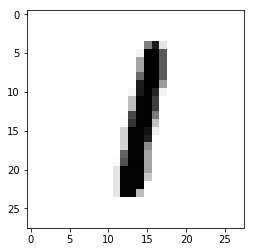

In [12]:
nb_classes = 10

#MNIST data image of shape 28*28 = 784
X = tf.placeholder(tf.float32,[None,784])
#0-9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32,[None,nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15 # one epoch : one forward pass and one backward of all the training examples
batch_size = 100 # Define size of training set in whole training set
# Ex : 1000 training examples, if batch size is 500, then it will take 2 iterations to complete 1 epoch

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size) # ex : 10000/100, defines how many batch cycles
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost += c/total_batch
        print('Epoch:','%04d' % (epoch+1), 'cost:','{:.9}'.format(avg_cost))
        
    print("Learning done!")
    
    # Test the model using test sets
    print('Accuracy:',accuracy.eval(session=sess,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
    # above is same as sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels})
    
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples - 1) # Read random number
    print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1))) # That prints the label of number what we read
    # Then using hypothesis to predict
    print('prediction:',sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
    plt.show()
